***Google Monthly Stock Prediction***

Using the dataset from kaggle.com. I will use it to build a model that predicts the stock price of Google for the 
next month. The dataset contains 4 mainly needed columns to complete the prediction. Opening and Closing of stock 
will be of great value here. This will form a model on its own and then a model for low and high stock price will be
built.

First, let's load the dataset and see what we have in it.

In [1]:
import pandas as pd

data = pd.read_csv('GOOGLE_monthly.csv')

data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
231,2023-12-01,133.320007,143.945007,129.399994,140.929993,140.929993,482059400
232,2024-01-01,139.600006,155.199997,136.850006,141.800003,141.800003,428771200
233,2024-02-01,143.690002,150.695007,136.639999,139.779999,139.779999,475231400
234,2024-03-01,139.610001,153.199997,131.550003,152.259995,152.259995,507008200
235,2024-03-28,152.000000,152.669998,151.330002,152.259995,152.259995,20971645


The dataset contains 7 columns. We will be using the Date, Open, High, Low, Close, Volume(The number of shares traded
on that month) and Adj Close(Adjusted closing price of the company's stock on that month) columns.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       236 non-null    object 
 1   Open       236 non-null    float64
 2   High       236 non-null    float64
 3   Low        236 non-null    float64
 4   Close      236 non-null    float64
 5   Adj Close  236 non-null    float64
 6   Volume     236 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.0+ KB


**Data Cleaning**

In [3]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values in the dataset. 

**Data Visualization**

We can now proceed to check the trends of the stock prices over the years. We will plot the Open and Close prices of 
the stock. 

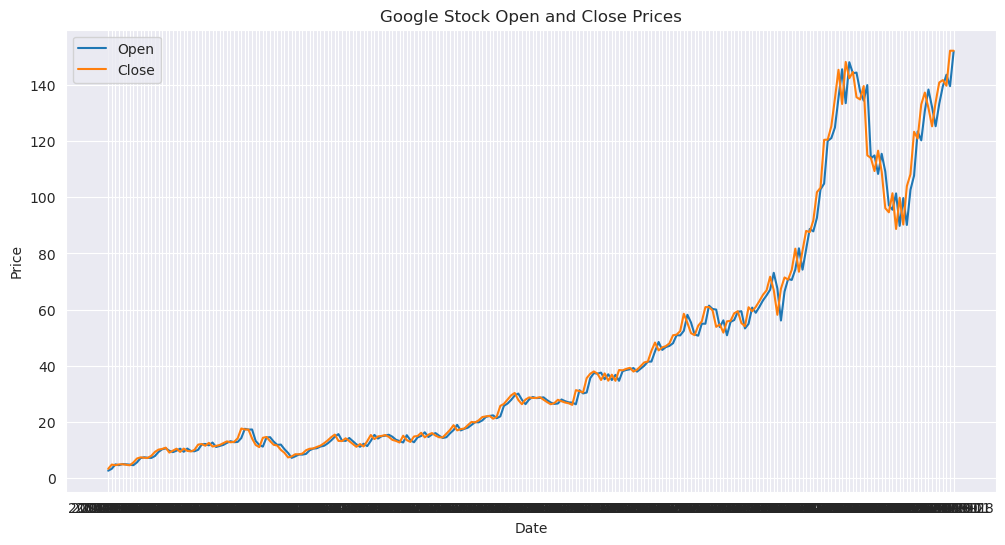

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data,x='Date', y='Open', label='Open')
sns.lineplot(data,x='Date', y='Close', label='Close')
plt.title('Google Stock Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The plot shows that the stock price of Google has been increasing over the years. The Open and Close prices are
almost the same.Now let us see the difference in the High and Low prices of the stock.

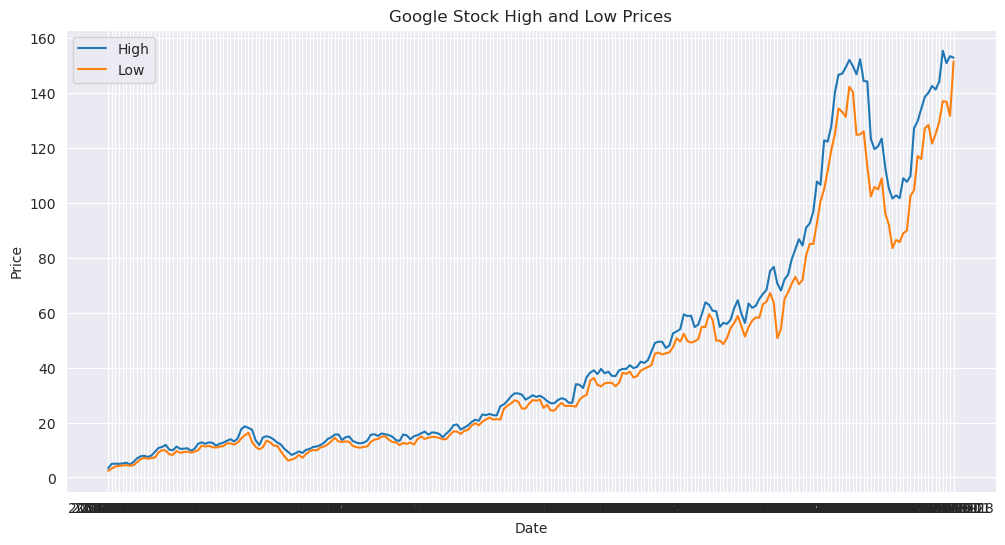

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data,x='Date', y='High', label='High')
sns.lineplot(data,x='Date', y='Low', label='Low')
plt.title('Google Stock High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The plot shows that the High and Low prices of the stock have been increasing over the years. The High price is
higher than the Low price. The difference between the High and Low prices is not much.

**Model Building**

We will build a model that predicts the stock price of Google for the next month. We will use the Open and Close
prices of the stock to build the first model. First, we need to stabilise the data by removing the trend and 
seasonality. We shall smoothen it out using the Moving Average method. We will filter the data from 2018 to 2024.

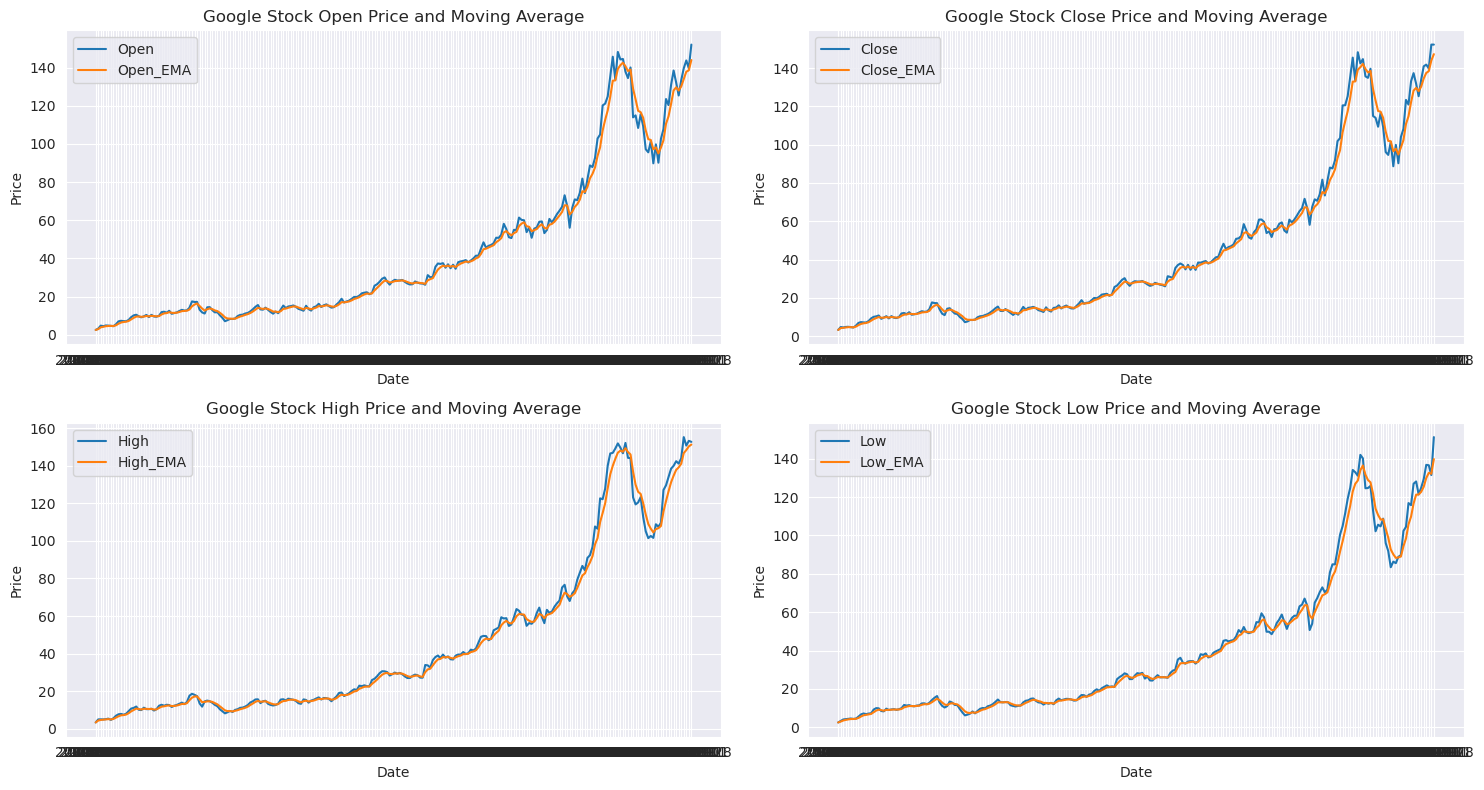

In [6]:
alpha = 0.4
data['Open_EMA'] = data['Open'].ewm(alpha=alpha).mean()
data['Close_EMA'] = data['Close'].ewm(alpha=alpha).mean()
data['High_EMA'] = data['High'].ewm(alpha=alpha).mean()
data['Low_EMA'] = data['Low'].ewm(alpha=alpha).mean()

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.lineplot(data=data, x='Date', y='Open', label='Open')
sns.lineplot(data=data, x='Date', y='Open_EMA', label='Open_EMA')
plt.title('Google Stock Open Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(data=data, x='Date', y='Close', label='Close')
sns.lineplot(data=data, x='Date', y='Close_EMA', label='Close_EMA')
plt.title('Google Stock Close Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(data=data, x='Date', y='High', label='High')
sns.lineplot(data=data, x='Date', y='High_EMA', label='High_EMA')
plt.title('Google Stock High Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 2, 4)
sns.lineplot(data=data, x='Date', y='Low', label='Low')
sns.lineplot(data=data, x='Date', y='Low_EMA', label='Low_EMA')
plt.title('Google Stock Low Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

For now,using the Moving Average it has smoothened the curve of the stock prices. We can now proceed to
building the model using the Open and Close prices of the stock. We need a feature that will help to predict 
and a target variable. The feature will be the Open as Close will be the target. We will split the data into
training and testing sets.

In [7]:
from sklearn.model_selection import train_test_split

X = data['Open_EMA']
y = data['Close_EMA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(188, 1) (48, 1) (188, 1) (48, 1)


**Model Evaluation for Open and Close Prices.**

By use of Linear Regression model, we will evaluate the model using the Mean Squared Error and R2 Score.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 6.022653703817582
R2 Score: 0.9964464140285868


The Mean Squared Error of 6.022 and R2 score of 0.996 shows that the model is accurate. We can proceed to 
predict the stock price of Google for the next month.

In [9]:
import numpy as np 

X_new = np.array([data['Open_EMA'].iloc[-1]])

y_new = model.predict(X_new.reshape(-1, 1))

print('Predicted Close Price:', y_new[0][0])

Predicted Close Price: 145.43418123461745


The predicted Close price of Google for the next month is 145.43 . 

**Model Deployment for Open and Close Prices**

This model will be able to predict the Open and Close stock prices of Google for the next month.  

In [13]:
import joblib

joblib.dump(model, 'google_stock_open_close_model.pkl')

['google_stock_open_close_model.pkl']

**Model Evaluation for Low and High Prices**

Let us shift to Low and High stock prices. We will build a model that predicts the Low and High stock prices of
Google for the next month.

In [10]:
X = data['Low_EMA']
y= data['High_EMA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(188, 1) (48, 1) (188, 1) (48, 1)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 3.6847878978149606
R2 Score: 0.9980695974481344


The MSE is at 3.68 as R2 score is at 0.998. The model is accurate. We can now predict the Low and High stock
of Google for the next month.

In [12]:
X_new = np.array([data['Low_EMA'].iloc[-1]])

y_new = model.predict(X_new.reshape(-1, 1))

print('Predicted High Price:', y_new[0][0])

Predicted High Price: 158.0850400628238
